In [ ]:
import matplotlib.pyplot as plt
import diffusion_curvature
from diffusion_curvature.core import plot_3d
from diffusion_curvature import laziness
import numpy as np
import tadasets
# Reload any changes 
%load_ext autoreload
%autoreload 2

# 03c Absolute Curvature with Laziness

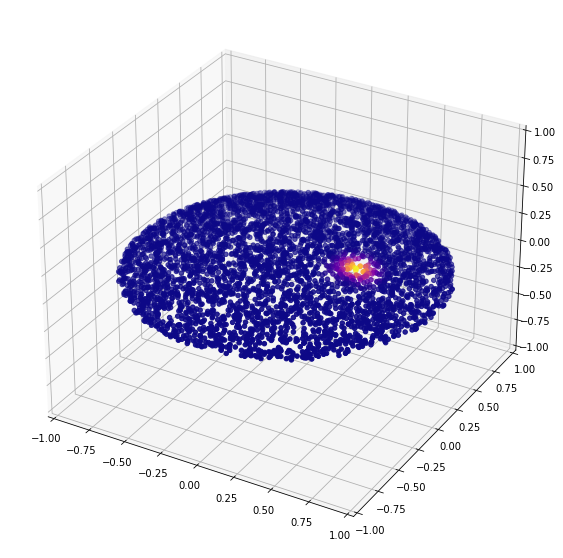

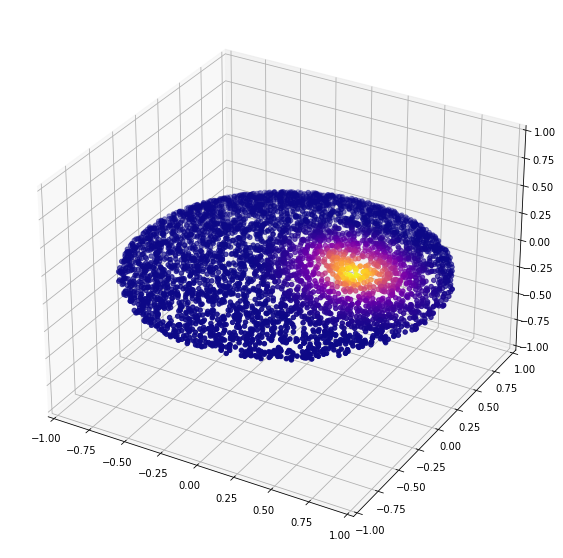

In [ ]:
num_points = 5000
diffusion_powers = 8
radius = 8
dsphere = tadasets.dsphere(n=num_points*2**(radius), d= 3 - 1, r=radius)
polar_cap = dsphere[dsphere[:,2] > radius - 1]
X = polar_cap[np.random.choice(np.arange(len(polar_cap)),num_points)].astype('float32')
# normalize the points so that the expansion in the x-y plane has norm 1
max_len = np.max(np.linalg.norm(X[:,:2],axis=1))
X = X / max_len
# recenter the z axis to zero.
min_z = np.min(X[:,2])
X[:,2] -= min_z
# Get diffusion matrix
P = diffusion_curvature.core.DiffusionMatrix(X,kernel_type='adaptive',sigma=0.3)
P_t = np.linalg.matrix_power(P,diffusion_powers)
ks = laziness.curvature(P, diffusion_powers=diffusion_powers,aperture=20, smoothing=1, verbose = False, return_density = False, avg_transition_probability=True)

plot_3d(X,P[0])
plot_3d(X,P_t[0])

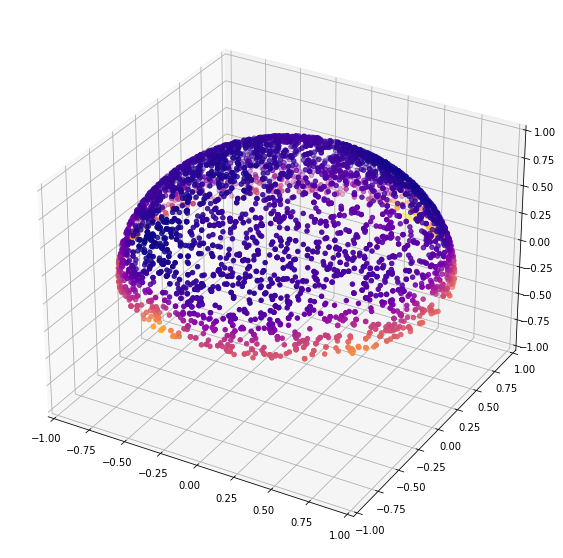

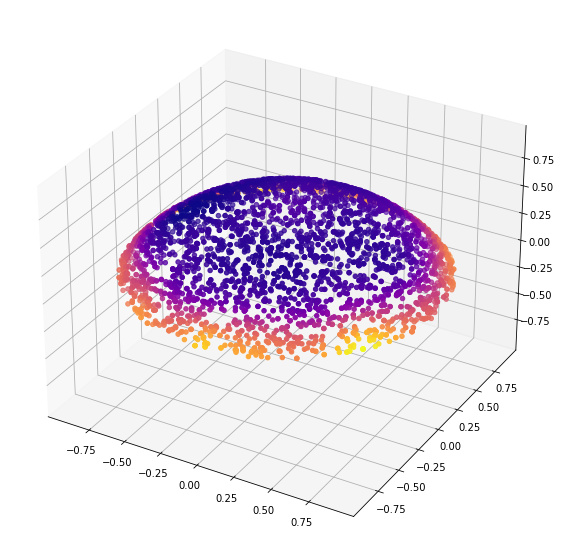

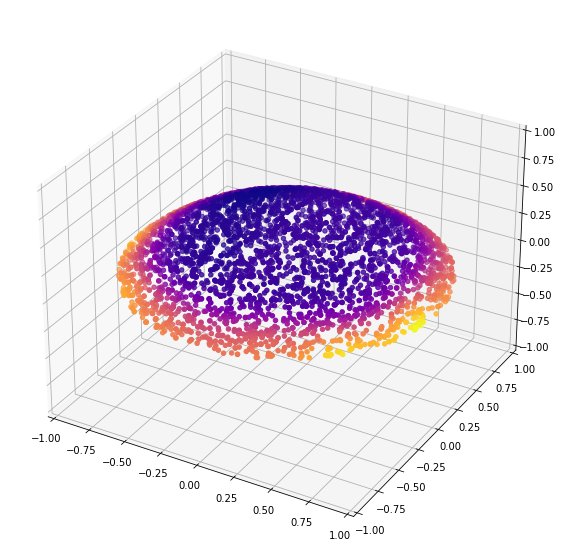

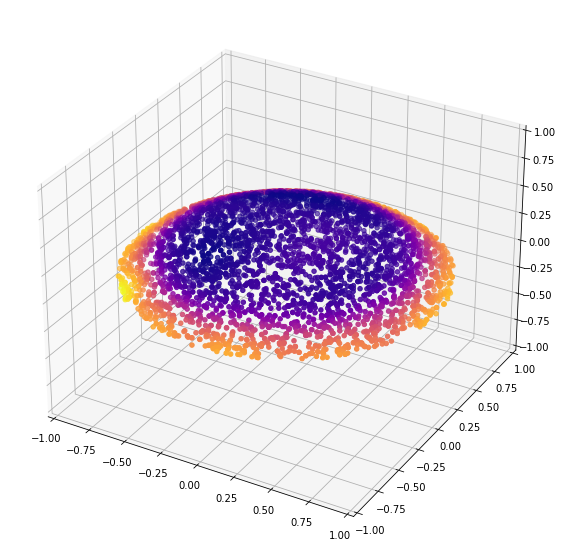

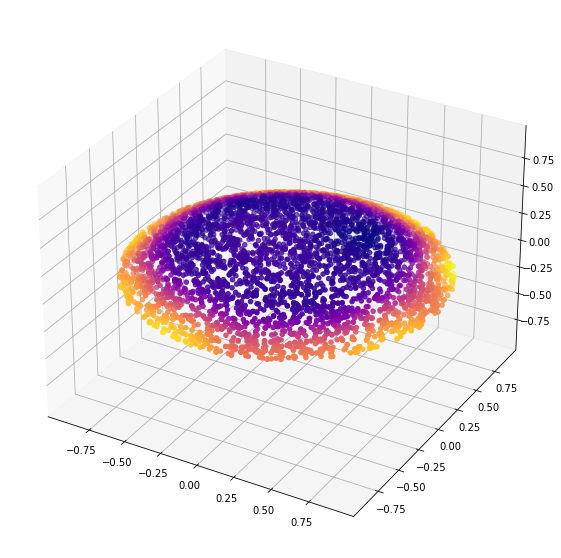

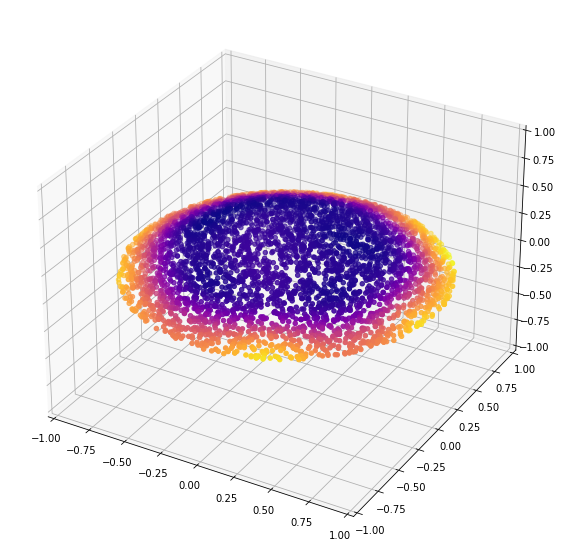

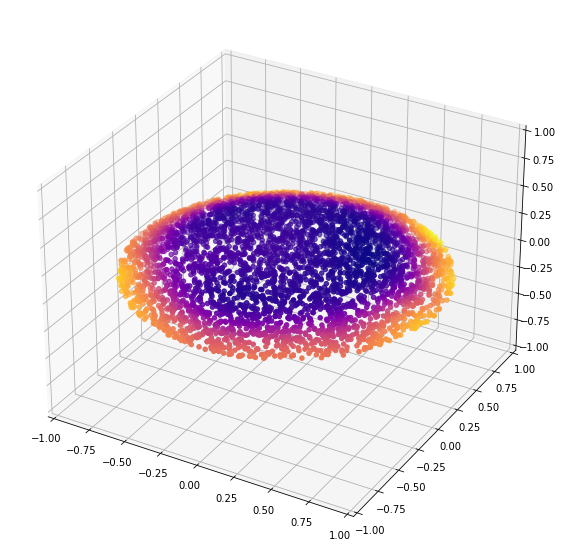

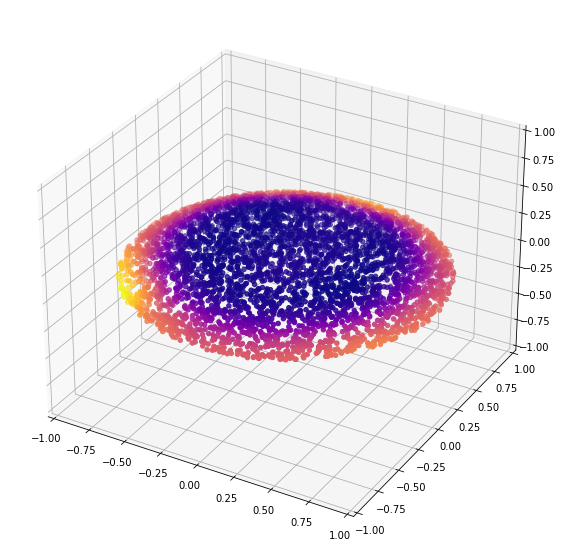

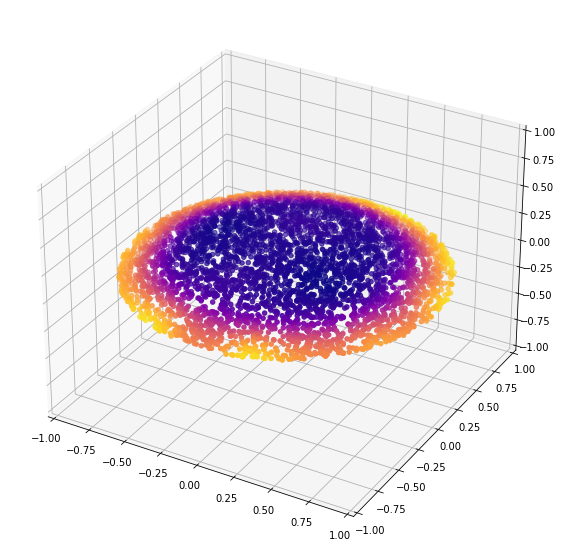

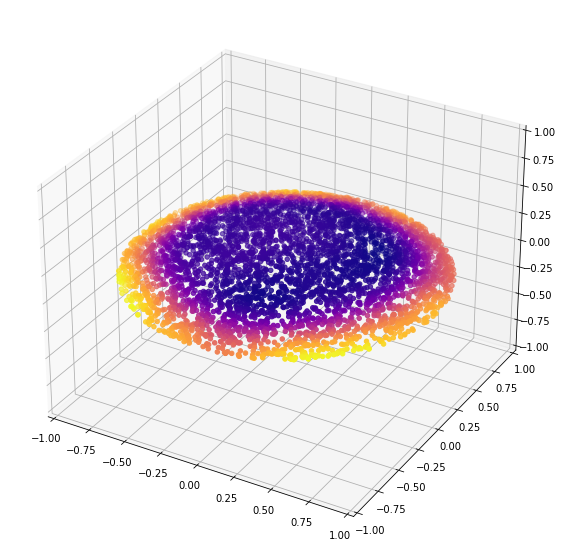

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


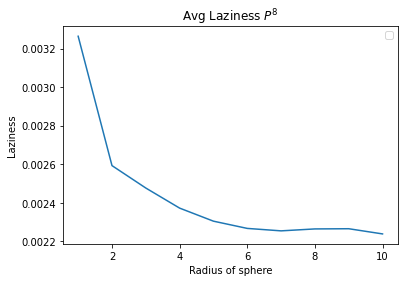

In [ ]:
num_points = 5000
diffusion_powers = 8
normalized = False
radii = [1,2,3,4,5,6,7,8,9,10]
mean_ks = []
for radius in radii:
    dsphere = tadasets.dsphere(n=num_points*2**(radius), d= 3 - 1, r=radius)
    polar_cap = dsphere[dsphere[:,2] > radius - 1]
    X = polar_cap[np.random.choice(np.arange(len(polar_cap)),num_points)].astype('float32')
    # normalize the points so that the expansion in the x-y plane has norm 1
    max_len = np.max(np.linalg.norm(X[:,:2],axis=1))
    X = X / max_len
    # recenter the z axis to zero.
    min_z = np.min(X[:,2])
    X[:,2] -= min_z
    # Get diffusion matrix
    P = diffusion_curvature.core.DiffusionMatrix(X,kernel_type='anisotropic',sigma=0.1)
    ks = laziness.curvature(P, diffusion_powers=diffusion_powers,aperture=100, smoothing=1, verbose = False, return_density = False, avg_transition_probability=True)
    plot_3d(X,ks)

    # find the highest 50% of points and average their curvatures
    highest_idxs = np.argsort(X[:,2])[:int(num_points*0.5)]
    avg_k = np.mean(ks[highest_idxs])
    mean_ks.append(avg_k)

fig, ax = plt.subplots(1)
ax.plot(radii,mean_ks)
ax.legend()
ax.set_title(f"Avg Laziness $P^{diffusion_powers}$")
plt.xlabel("Radius of sphere")
plt.ylabel("Laziness")
plt.show()

In [ ]:
scaled_mean_ks = (mean_ks - min(mean_ks))
scaled_mean_ks = scaled_mean_ks/max(scaled_mean_ks)
scaled_mean_ks

array([1.        , 0.34556598, 0.23213559, 0.13054274, 0.06448212,
       0.02786198, 0.01547157, 0.02524125, 0.0262566 , 0.        ])

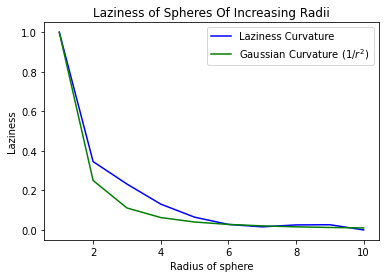

In [ ]:
real_ks = [1/r**2 for r in radii]
fig, ax = plt.subplots(1)
ax.plot(radii,scaled_mean_ks,color="blue",label="Laziness Curvature")
ax.plot(radii,real_ks,color="green",label="Gaussian Curvature (1/$r^2$)")
ax.legend()
ax.set_title(f"Laziness of Spheres Of Increasing Radii")
plt.xlabel("Radius of sphere")
plt.ylabel("Laziness")
plt.show()